# Coloring plots with specific colors

In this notebook we have rock chemistry data, along with RGB colors for each rock sample. We want to plot up the chemistry data with the actual colors of each sample. All we need to do that is `pandas` to read in our data, and `matplotlib` to plot up the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now let's read the data into a `DataFrame` using `pandas` with encoding set to `utf-8` and then do a quick check on the structure of the data

In [2]:
data = pd.read_csv('element_data.csv', encoding='utf-8')
data.head()

,Sample ID,color,E1,E2,E3,E4,E5,E6,E7,E8,R,G,B
0,1,1,0.00,6.73,855.78,393.40,0.00,0.0,5.22,0.96,29,58,0
1,2,1,0.00,8.69,3074.37,230.07,0.00,0.0,0.00,0.00,29,58,0
2,3,1,0.00,10.35,1263.00,991.80,18.28,0.0,6.36,16.02,29,58,0
3,4,1,104.04,9.03,1209.78,20.06,0.00,0.0,5.70,0.00,29,58,0
4,5,1,0.00,6.79,672.00,0.00,0.00,0.0,0.00,7.30,29,58,0


We have a `Sample ID`, a `color` class, and then 8 different elements `E1` through `E8`, followed by 3 columns that represent our RGB values `R`, `G`, `B`. I want our RGB data in hex values just because there is a bit more I can do with them later on if I choose. So I iterate through the `DataFrame` and reformat the RGB values to hex, and add them to a list

In [3]:
hex_colors = []
for sample in data.index:
    hex_colors.append('#%02x%02x%02x' % (data.loc[sample].R.astype(int), data.loc[sample].G.astype(int), data.loc[sample].B.astype(int)))

Then we want to add the `hex_colors` to the `DataFrame` as a new series

In [4]:
data['hex'] = hex_colors

Now we can plot up the data by color since each sample now has a `hex` column. To do so, we set the `color` parameter equal to the `hex` column using `data.iloc[i, -1]` which calls the last column for that sample, which happens to be the `hex` column at the end of the `DataFrame`

Text(0.5, 1.0, 'Rock Elemental Composition')

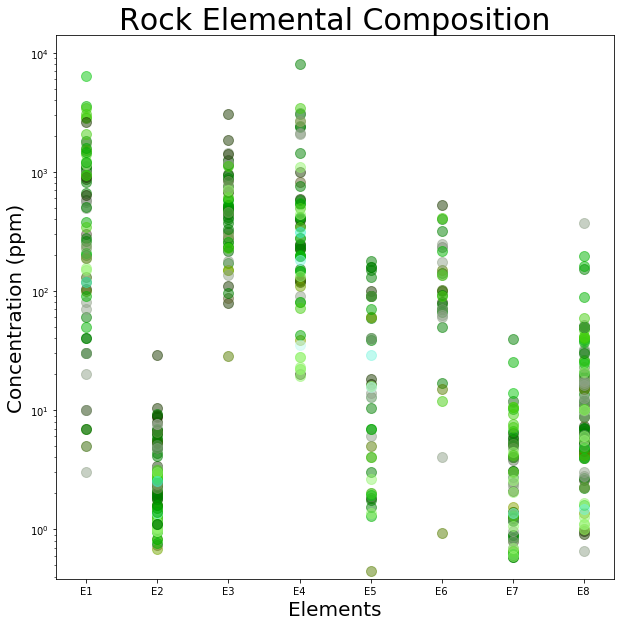

In [5]:
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_yscale('log')
for i in range(160):
    ax.scatter(data.columns[2:-4], data.iloc[i,2:-4], alpha=0.5, color=data.iloc[i, -1], s=100)
plt.xlabel('Elements', fontsize=20)
plt.ylabel('Concentration (ppm)', fontsize=20)
plt.title('Rock Elemental Composition', fontsize=30)


And there we have it! We have each sample colored according to it's physical rock color, and each sample has it's elemental concentration plotted for the eight different elements.

This notebook is licensed CC-BY and is free to share and use, for further information see the LICENSE.md in the main folder of this repository